In [1]:
# import depenedencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load data
ohtani = pd.read_csv("660271_data.csv")

In [3]:
# preview data
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2022-07-13,82.6,-2.12,5.39,"Ohtani, Shohei",660271,664299,walk,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,307.0,0.013,0.057
1,CH,2022-07-13,83.9,-2.05,5.51,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,217.0,0.000,0.086
2,CH,2022-07-13,85.1,-2.00,5.47,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,232.0,0.000,0.053
3,CH,2022-07-13,85.2,-1.98,5.36,"Ohtani, Shohei",660271,664299,NaN,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,249.0,0.000,0.038
4,FF,2022-07-13,95.5,-1.73,5.43,"Ohtani, Shohei",660271,664299,triple,hit_into_play,...,0,0,3,3,0,Infield shift,Standard,209.0,0.170,2.051


In [4]:
# filter for 2021 season
ohtani21 = ohtani[pd.to_datetime(ohtani.game_date).dt.year==2021]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [5]:
# Summarize Ohtani's batted events in 2021
ohtani21["events"].value_counts()

field_out                    190
strikeout                    188
walk                          76
single                        58
home_run                      46
double                        26
triple                         8
grounded_into_double_play      7
field_error                    6
force_out                      4
hit_by_pitch                   4
fielders_choice                3
sac_fly                        2
strikeout_double_play          1
pickoff_3b                     1
Name: events, dtype: int64

In [6]:
# filter for just Ohtani's homeruns in 2021
ohtani21_hr = ohtani21[ohtani21.events=="home_run"]

In [7]:
# how fast were the pitches that Ohtani hit home runs off of? How fast were they on average?
hr_av_speed=ohtani21_hr.release_speed.mean()
print(f"Ohtani hit home runs on pitches that were on average {round(hr_av_speed,1)} mph")

Ohtani hit home runs on pitches that were on average 88.7 mph


In [8]:
# how do these pitches compare to the pitches he struck out on?
ohtani21_so = ohtani21[ohtani21.events == "strikeout"]
so_av_speed=ohtani21_so.release_speed.mean()
print(f"Ohtani struck on pitches that were on average {round(so_av_speed,1)} mph")

Ohtani struck on pitches that were on average 88.2 mph


### It doesn't seem that in terms of speed, on average, the pitches that Ohtani struck out on were that noticeably different from the pitches he struck out on. However, averages can be deceiving based on how data is distributed, so it might be worth looking at the range of pitch speeds rather than just the averages

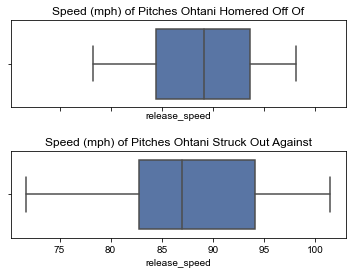

In [9]:
# create box plots of the pitch speeds for both home runs and strike outs. Plot them side by side

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.set(rc={"figure.figsize":(8, 4)})
plt.subplots_adjust(hspace = 0.5)
sns.boxplot(x="release_speed", data=ohtani21_hr, ax=axs[0]).set_title("Speed (mph) of Pitches Ohtani Homered Off Of")
sns.boxplot(x="release_speed", data=ohtani21_so, ax=axs[1]).set_title("Speed (mph) of Pitches Ohtani Struck Out Against")
plt.show()

### The box plots also suggest that pitch speeds were similar for when Ohtani hit home runs or struck out. The median pitch speed for both outcomes seems to be in the high 80s, much as the averages calculated earlier suggest. Though home runs were hit off a narrower range of pitch speeds, the middle 50 percent of pitches for both fit within a similar range of speeds. The narrower range might also be explained by the fact that overall, Ohtani struck out more often than he hit homeruns (188 strike outs vs 46 home runs), therefore there was less room for variability.

## Let's expand the scope a bit
### While Ohtani was among the top sluggers in 2021, homeruns still only represented a small portion of all his plate appearances. What made Ohtani formidable as a batter wasn't just that he hit a lot of homeruns, but that he hit hard. In fact, his slugging average of .592 was the fourth highest in all of MLB in 2021. In other words, what made him formidable was the he hit for extra bases a lot.
### So let's look all at extra base hits (doubles, triples, and home runs), not just home runs.

In [10]:
# filter data for extra base hits
ohtani21_eb = ohtani21[(ohtani21.events=="home_run") | (ohtani21.events=="double") | (ohtani21.events=="triple")]

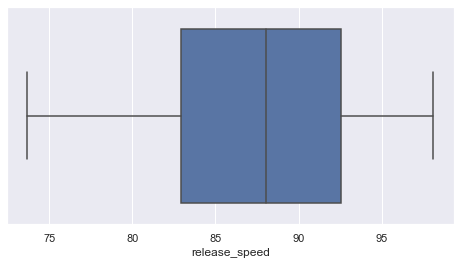

In [11]:
# how fast were the pitches that Ohtani hit extra bases for?
sns.boxplot(x="release_speed", data=ohtani21_eb)
plt.show()

### It appears that Ohtani hit for extra bases typically on balls in the high 80 mph to low 90 mph range. However, is this really the pattern for extra base hits in general, or did homeruns in particular seem to be different?

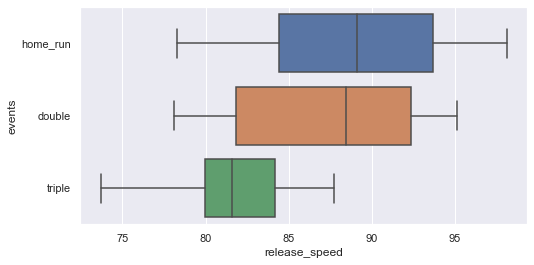

In [36]:
# create box plot displaying different types of extra base hits separately
sns.boxplot(x="release_speed", y="events", data=ohtani21_eb)
plt.show()

### It seems that Ohtani hit doubles and home runs off somewhat similar pitches in terms of speed with median values in the high 80 mph range. However, it does appear that he hit home runs off a few pitches in the high 90 mph range whereas the fastest pitch he hit a double off was approximately 95 mph. He tended to hit triples off of noticeably slower pitches than both doubles and home runs. However, considering that he only hit eight triples in total in 2021 opposed to his 26 doubles and 46 home runs, we might not have a large enough sample to meaningfully analyze patterns with his triples.

### How do these compare to his singles though?

In [87]:
# create list of what counts as a hit
hits = ["single", "double", "triple", "home_run"]

In [89]:
# filter data for hits
ohtani21_hits = ohtani21[(ohtani21.events.isin(hits))]

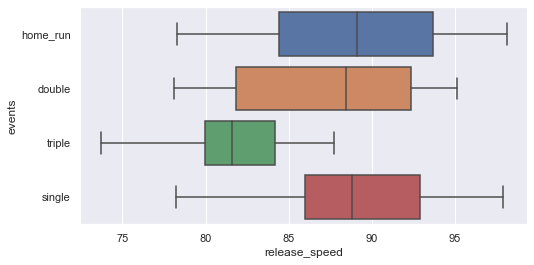

In [90]:
# create box plot to compare different kinds of hits by pitch speed
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="release_speed", y="events", data=ohtani21_hits)
plt.show()

### Ohtani's singles have a very similar distribution to his home runs. The pitch speeds covered almost an identical range and it seems that he hit both home runs and singles typically off pitches that were in the high 80 mph to low 90 mph range.

### However, home runs and singles are very different outcomes. Is there anything else about the pitches that might have influenced these outcomes? How about pitch location? Were there any parts of the strike zone where Ohtani managed to hit harder?

## Pitch Location
### Let's visualize the strike zone and map where the pitches tended to go for each outcome

In [38]:
# create function to assign x coordinate value for pitch location
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [39]:
# create function to assign y coorrdinate value for pitch location
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

## Let's first see what parts of the strike zone Ohtani hit his hits in general.

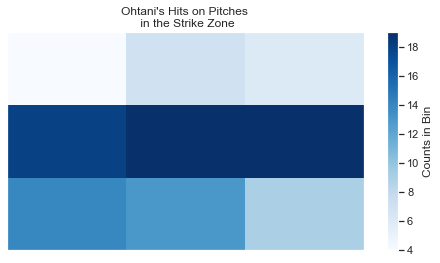

In [17]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_hits_zones = ohtani21_hits.copy().loc[ohtani21_hits.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's hits
ohtani21_hits_zones['zone_x'] = ohtani21_hits_zones.apply(assign_x_coord, axis=1)
ohtani21_hits_zones['zone_y'] = ohtani21_hits_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's hit zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_hits_zones['zone_x'], y=ohtani21_hits_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Hits on Pitches \n in the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### It looks like overall, he didn't hit much in the upper third of the strike zone. He seemed to have some success in the lower inner corner and lower middle portion of his strike zone. The middle horizontal band seemed to be where he did best. He in particular did well in the outter middle and the dead-center, which is typical favorite for batters.
### But let's now look at the different types of hits. Did they tend to be hit in specific parts of the strike zone?

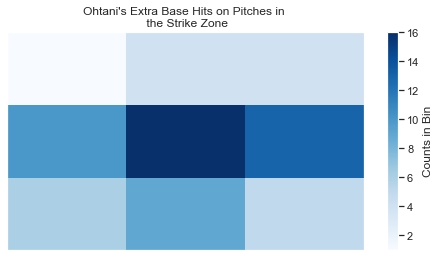

In [18]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_eb_zones = ohtani21_eb.copy().loc[ohtani21_eb.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's extra base hits
ohtani21_eb_zones['zone_x'] = ohtani21_eb_zones.apply(assign_x_coord, axis=1)
ohtani21_eb_zones['zone_y'] = ohtani21_eb_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's extra base hit zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_eb_zones['zone_x'], y=ohtani21_eb_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Extra Base Hits on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### In general, his extra-base hits tended to be from the middle band of the strike zone. Again, the middle outter and dead center seem to be his favorites. But is this true of all extra-base hits?

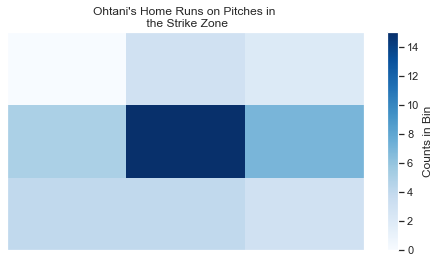

In [19]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_hr_zones = ohtani21_hr.copy().loc[ohtani21_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's home runs
ohtani21_hr_zones['zone_x'] = ohtani21_hr_zones.apply(assign_x_coord, axis=1)
ohtani21_hr_zones['zone_y'] = ohtani21_hr_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's home run zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_hr_zones['zone_x'], y=ohtani21_hr_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Home Runs on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### The center is the clear favorite when it comes to home runs. Otherwise, he seemed to hit some in every part of the zone except the inner-upper segment and with a slight preference for the middle horizontal band.

In [20]:
# filter data for triples
ohtani21_t = ohtani21_hits[ohtani21_hits.events=="triple"]

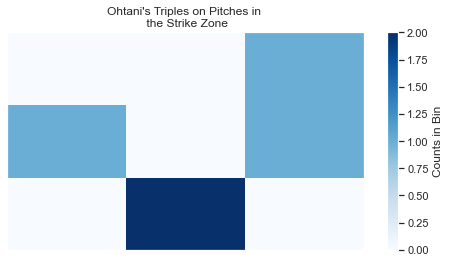

In [21]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_t_zones = ohtani21_t.copy().loc[ohtani21_t.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's triples
ohtani21_t_zones['zone_x'] = ohtani21_t_zones.apply(assign_x_coord, axis=1)
ohtani21_t_zones['zone_y'] = ohtani21_t_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's triple zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_t_zones['zone_x'], y=ohtani21_t_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Triples on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### There doesn't seem to be a noticeable pattern to his triples. Two were hit off the lower middle and the rest were more or less evenly split among the inner middle, outter middle, and outter upper segments. None were hit in the center. As already noted, with just eight, it's difficult to discern a pattern to his triples.

In [22]:
# filter data for doubles
ohtani21_d = ohtani21_hits[ohtani21_hits.events=="double"]

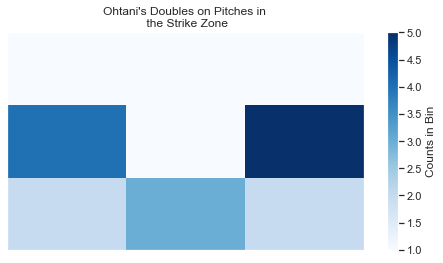

In [23]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_d_zones = ohtani21_d.copy().loc[ohtani21_d.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's doubles
ohtani21_d_zones['zone_x'] = ohtani21_d_zones.apply(assign_x_coord, axis=1)
ohtani21_d_zones['zone_y'] = ohtani21_d_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's double zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_d_zones['zone_x'], y=ohtani21_d_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Doubles on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### It seems that Ohtani managed to only hit a double once off the center. Otherwise, he still seemed to enjoy success in the middle horizontal band and managed to hit a few in the lower third in general but not much in the upper third.

In [24]:
# Filter data for singles
ohtani21_s = ohtani21_hits[ohtani21_hits.events=="single"]

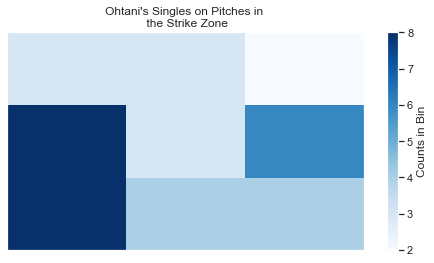

In [25]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_s_zones = ohtani21_s.copy().loc[ohtani21_s.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's singles
ohtani21_s_zones['zone_x'] = ohtani21_s_zones.apply(assign_x_coord, axis=1)
ohtani21_s_zones['zone_y'] = ohtani21_s_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's single zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_s_zones['zone_x'], y=ohtani21_s_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Singles on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### Ohtani hit his singles most frequently in the inner lower and inner middle segments of the strike zone. The outter middle also seemed to be good for singles. The outter upper seemed to be the most difficult.

### Overall, while the center was the clear favorite, the horizontal middle zone in general seemed to be Ohtani's sweet spot. Not only did he hit some of his home runs off both the outter and inner middle, but a lot of his doubles and singles were also in these segments, as well as a few of his triples. 
### The upper inner seemed to be his weakest point overall. Virtually none of his extra base hits were hit there. This didn't seem to be his weakest point in terms of singles, but he still didn't manage to successfully single off of there much.
### But where in the zone did he tend to struggle with?

In [78]:
# create list of what qualifies as a strike
strikes = ["called_strike", "swinging_strike"]

In [80]:
# filter data for strikes
ohtani21_strikes = ohtani21[(ohtani21.description.isin(strikes))]

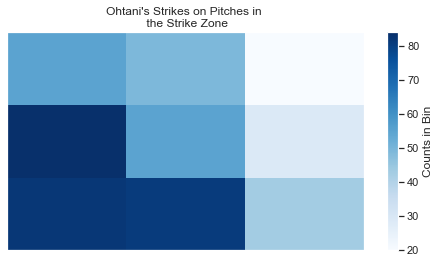

In [28]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_strikes_zones = ohtani21_strikes.copy().loc[ohtani21_strikes.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's strikes
ohtani21_strikes_zones['zone_x'] = ohtani21_strikes_zones.apply(assign_x_coord, axis=1)
ohtani21_strikes_zones['zone_y'] = ohtani21_strikes_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's strikes' zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_strikes_zones['zone_x'], y=ohtani21_strikes_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Strikes on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### It seems that pitches managed to get strikes off of Ohtani largely in the middle lower, inner lower, and inner middle segments. 

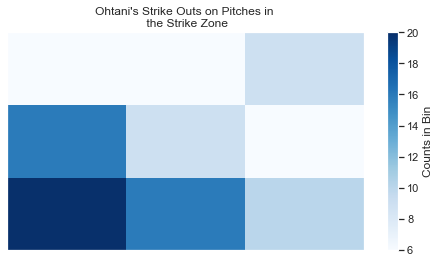

In [26]:
ohtani21_so_zones = ohtani21_so.copy().loc[ohtani21_so.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's strike outs
ohtani21_so_zones['zone_x'] = ohtani21_so_zones.apply(assign_x_coord, axis=1)
ohtani21_so_zones['zone_y'] = ohtani21_so_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's strole out zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_so_zones['zone_x'], y=ohtani21_so_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Strike Outs on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [29]:
ohtani21_fo = ohtani21[ohtani.events=="field_out"]

<ipython-input-29-42e7c8e897a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ohtani21_fo = ohtani21[ohtani.events=="field_out"]


In [30]:
ohtani21_fo.groupby("events")["pitch_type"].value_counts(normalize=True)

events     pitch_type
field_out  FF            0.221053
           CH            0.210526
           SL            0.178947
           CU            0.121053
           SI            0.121053
           FC            0.089474
           KC            0.031579
           FS            0.026316
Name: pitch_type, dtype: float64

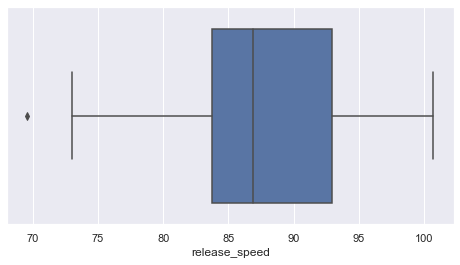

In [31]:
sns.boxplot(x="release_speed", data=ohtani21_fo)
plt.show()

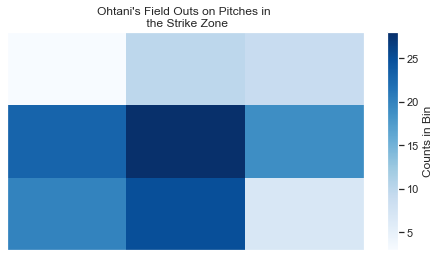

In [40]:
ohtani21_fo_zones = ohtani21_fo.copy().loc[ohtani21_fo.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Ohtani's field outs
ohtani21_fo_zones['zone_x'] = ohtani21_fo_zones.apply(assign_x_coord, axis=1)
ohtani21_fo_zones['zone_y'] = ohtani21_fo_zones.apply(assign_y_coord, axis=1)

# Plot Ohtani's field out zone as a 2D histogram with a colorbar
plt.hist2d(x=ohtani21_fo_zones['zone_x'], y=ohtani21_fo_zones['zone_y'], bins = 3, cmap='Blues')
plt.title("Ohtani's Field Outs on Pitches in \n the Strike Zone")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [91]:
ohtani21_h_vs_s = ohtani21[(ohtani21.events.isin(hits)) | (ohtani21.description.isin(strikes))]

In [92]:
def hit_or_strike(row):
    if row.description == "called_strike":
        return 0
    if row.description == "swinging_strike":
        return 0
    else:
        return 1

In [93]:
ohtani21_h_vs_s["hit_or_strike"] = ohtani21_h_vs_s.apply(hit_or_strike, axis=1)

<ipython-input-93-74ef96ce563a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohtani21_h_vs_s["hit_or_strike"] = ohtani21_h_vs_s.apply(hit_or_strike, axis=1)


In [94]:
ohtani21_h_vs_s["hit_or_strike"]

1454    0
1456    0
1457    0
1458    0
1459    0
       ..
4031    0
4034    0
4039    0
4042    0
4046    0
Name: hit_or_strike, Length: 881, dtype: int64

In [95]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ohtani21_h_vs_s_zones = ohtani21_h_vs_s.copy().loc[ohtani21_h_vs_s.zone <= 9]

In [96]:
ohtani21_h_vs_s_zones.groupby("zone")["hit_or_strike"].mean()

zone
1.0    0.067797
2.0    0.125000
3.0    0.230769
4.0    0.176471
5.0    0.256757
6.0    0.395833
7.0    0.145833
8.0    0.138298
9.0    0.173077
Name: hit_or_strike, dtype: float64